In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
k = int(input("Enter value of k: "))



In [73]:
# 1. Load Dataset
# ==============================
df = pd.read_excel("default of credit card clients.xls", header=1)
df.rename(columns={"default payment next month": "default"}, inplace=True)

In [74]:
X = df.drop(columns=["default"]).values
y = df["default"].values

In [75]:
# Reduce dataset size for speed (recommended for lab)
X = X[:5000]
y = y[:5000]

In [76]:
# 2. Train-Test Split (Manual)
# ==============================
def train_test_split(X, y, test_size=0.25):
    split = int(len(X) * (1 - test_size))
    return X[:split], X[split:], y[:split], y[split:]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [77]:
# 3. Feature Scaling (Manual)
# ==============================
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

X_train = standardize(X_train)
X_test = standardize(X_test)

In [78]:
def knn_classification_fast(X_train, y_train, X_test, k):
    predictions = []
    probabilities = []

    for test_point in X_test:
        distances = np.sqrt(np.sum((X_train - test_point) ** 2, axis=1))
        k_indices = np.argsort(distances)[:k]
        k_labels = y_train[k_indices]

        # Majority vote
        prediction = np.bincount(k_labels).argmax()
        predictions.append(prediction)

        # Probability of class 1 (for ROC)
        prob = np.sum(k_labels) / k
        probabilities.append(prob)

    return np.array(predictions), np.array(probabilities)


In [79]:
# 5. Prediction
# ==============================

y_pred, y_prob = knn_classification_fast(X_train, y_train, X_test, k)


In [80]:
# 6. Evaluation Metrics (Manual)
# ==============================
def evaluate(y_true, y_pred):
    tp = tn = fp = fn = 0

    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
        elif yt == 0 and yp == 0:
            tn += 1
        elif yt == 0 and yp == 1:
            fp += 1
        elif yt == 1 and yp == 0:
            fn += 1

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * precision * recall / (precision + recall)

    return tp, tn, fp, fn, accuracy, precision, recall, f1
tp, tn, fp, fn, acc, prec, rec, f1 = evaluate(y_test, y_pred)

In [81]:
def roc_curve_manual(y_true, y_prob):
    thresholds = np.unique(y_prob)[::-1]
    tpr_list = []
    fpr_list = []

    for thresh in thresholds:
        y_temp = (y_prob >= thresh).astype(int)

        tp = fp = tn = fn = 0
        for yt, yp in zip(y_true, y_temp):
            if yt == 1 and yp == 1: tp += 1
            elif yt == 0 and yp == 0: tn += 1
            elif yt == 0 and yp == 1: fp += 1
            elif yt == 1 and yp == 0: fn += 1

        tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return np.array(fpr_list), np.array(tpr_list)

fpr, tpr = roc_curve_manual(y_test, y_prob)

In [82]:
# 8. AUC Calculation (Trapezoidal Rule)
# ==============================
auc = np.trapezoid(tpr, fpr)


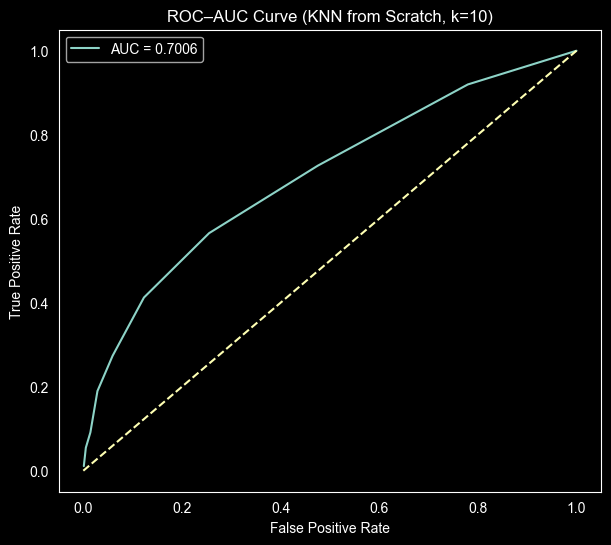

In [83]:
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC–AUC Curve (KNN from Scratch, k={k})")
plt.legend()
plt.grid()
plt.show()

In [84]:


print("Confusion Matrix Values:")
print(f"TP={tp}, TN={tn}, FP={fp}, FN={fn}")
print("\nAccuracy :", acc)
print("Precision:", prec)
print("Recall   :", rec)
print("F1 Score :", f1)

Confusion Matrix Values:
TP=52, TN=948, FP=28, FN=222

Accuracy : 0.8
Precision: 0.65
Recall   : 0.1897810218978102
F1 Score : 0.29378531073446323
